# ML_SP22_Project_2 (Classical Machine Learning Model Building)

### Due Date: 5/2 23:59 pm

In [477]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [478]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [479]:
# include your Project 1 Decision Tree Model as well
from DT_Humaira_Qadeer import DecisionTreeModel

### Original dataset was based on
https://archive.ics.uci.edu/ml/datasets/wine+quality

### However, we will be using a slightly modified version of the dataset as follow

In [480]:
df = pd.read_csv("wine-tasting.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type,pHValue,taste
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,0.45,8.8,white,very acidic,normal
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,0.49,9.5,white,quite acidic,normal
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,0.44,10.1,white,quite acidic,normal
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,white,very acidic,normal
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,white,very acidic,normal


<AxesSubplot:xlabel='taste', ylabel='count'>

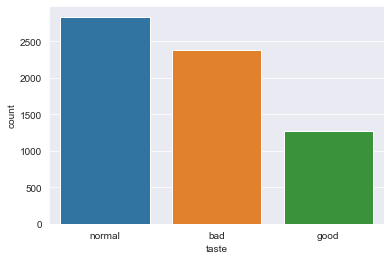

In [481]:
sns.countplot(x='taste',data=df)

<AxesSubplot:xlabel='taste', ylabel='count'>

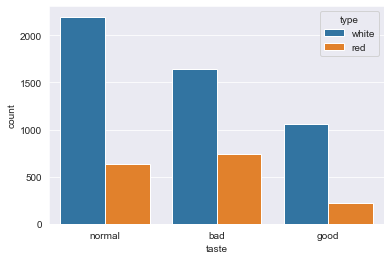

In [482]:
sns.countplot(x='taste', hue='type', data=df)

### Your task in this Project is to build the best predictive model to predict if a wine will be of good taste (ie we do not care if it is normal or bad taste, just good vs not good taste)

***You should follow the usual best practice in building models such as***

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least three (one of them is your own decision tree) models and checked their model performance
* performed cross-validations (f1-score)

***You should have also done the following***

* Try at least 3 models you have learned in class such as Logistic, Decision Tree, Random Forecast.
* Compare the sklearn Decision Tree with your own Decision Tree implementation results
* Include at least one ensemble models
* Identify out of all those you have tried, which one is the best model.

* For the best fitted model, does it work better for the Red wine or White wine or similar
* Can ensemble methods improve your models?
* Whether the categorical variable pH Value is important or not. If it is important, and you need to make a prediction for one instance where the pH value is missing, how would you proceed?

***And answer the following questions based on what you observe from your model building process***

Exploratory Data Analysis

In [483]:
df.shape

(6498, 13)

In [484]:
#total amount of missing values for each column
print(df.isnull().sum())

fixed acidity           1
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
sulphates               0
alcohol                 0
type                    0
pHValue                 0
taste                   0
dtype: int64


In [485]:
#data types for each column
print(df.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
sulphates               float64
alcohol                 float64
type                     object
pHValue                  object
taste                    object
dtype: object


In [486]:
#display rows with columns containing empty data
df[df.isnull().any(axis = 1)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type,pHValue,taste
36,NaN,0.28,0.43,1.7,0.08,21.0,123.0,0.9905,0.42,12.8,white,very acidic,bad


In [487]:
#remove rows with missing data
print(df.dropna(axis = 0, inplace = True))

None


In [488]:
#check to see missing values
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
sulphates               False
alcohol                 False
type                    False
pHValue                 False
taste                   False
dtype: bool

In [489]:
df.shape

(6497, 13)

Check and remove outliers

In [490]:
df.nunique(axis = 0)


fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
sulphates               111
alcohol                 111
type                      2
pHValue                   6
taste                     3
dtype: int64

In [491]:
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.996136,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.116596,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,10.389800,2.000000,14.900000


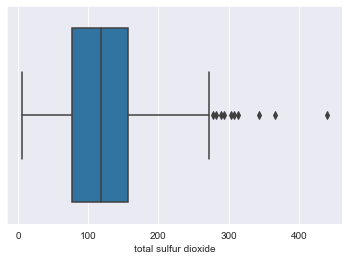

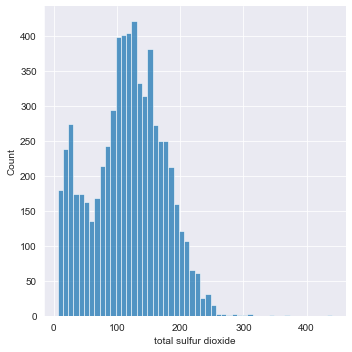

In [492]:
g=sns.boxplot(x=df['total sulfur dioxide'])
g=sns.displot(x = df['total sulfur dioxide'])

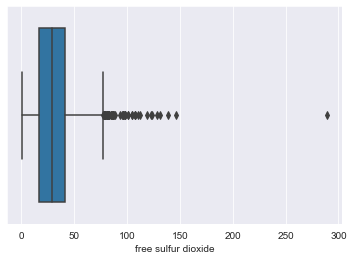

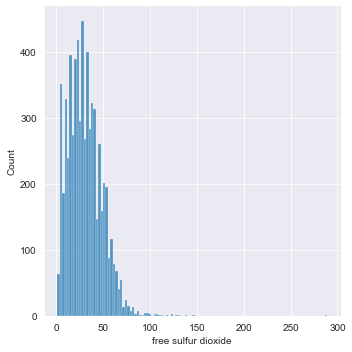

In [493]:
g=sns.boxplot(x=df['free sulfur dioxide'])
g=sns.displot(x = df['free sulfur dioxide'])

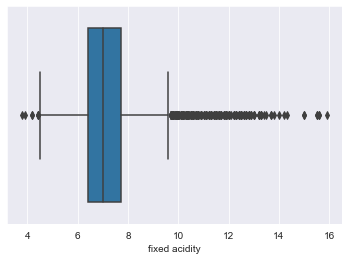

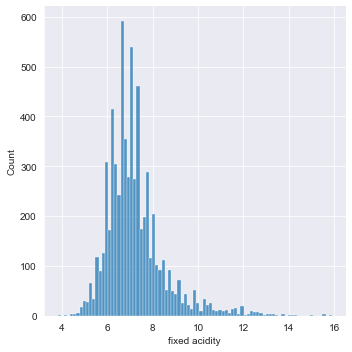

In [494]:
g=sns.boxplot(x=df['fixed acidity'])
g=sns.displot(x = df['fixed acidity'])

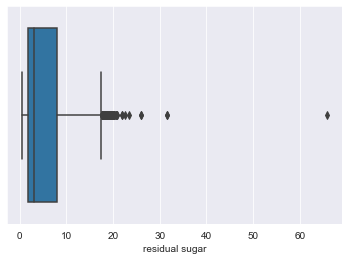

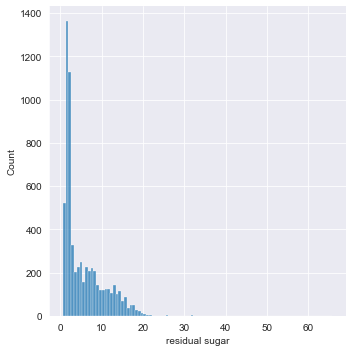

In [495]:
g=sns.boxplot(x=df['residual sugar'])
g=sns.displot(x=df['residual sugar'])

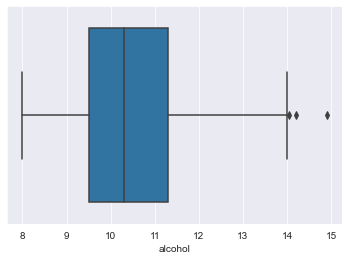

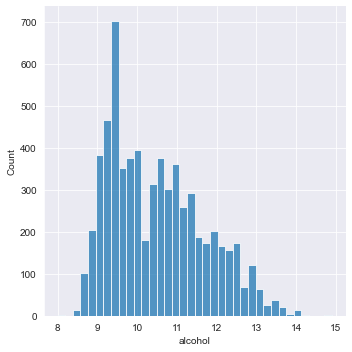

In [496]:
g=sns.boxplot(x=df['alcohol'])
g=sns.displot(x=df['alcohol'])

<AxesSubplot:>

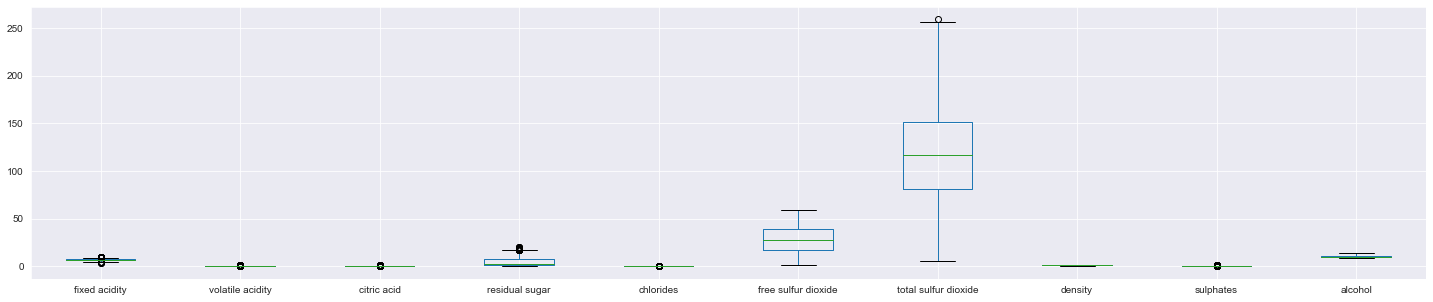

In [497]:
df2 = df[df['total sulfur dioxide'] <260]
df2 = df2[df2['free sulfur dioxide'] <60]
df2 = df2[df2['residual sugar'] <20]
df2 = df2[df2['alcohol'] <14]
df2 = df2[df2['fixed acidity'] <10]
df2 = df2[df2['fixed acidity'] <10]
df2.boxplot(figsize=(25,5))

In [498]:
df['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [499]:
df['pHValue'].value_counts()

very acidic        2588
quite acidic       2583
midly acidic        755
extremly acidic     466
acidic               96
lightly acidic        9
Name: pHValue, dtype: int64

In [500]:
df['taste'].value_counts()


normal    2836
bad       2384
good      1277
Name: taste, dtype: int64

In [501]:
df['taste']= df['taste'].apply(lambda x: 1 if x == 'good' else 0)

In [502]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,taste
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.017370,0.299568,-0.095452,-0.049447
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.053870,0.225984,-0.037640,-0.151714
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.026377,0.056197,-0.010493,0.054444
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.170827,-0.185927,-0.359415,-0.063992
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.015657,0.395593,-0.256916,-0.161781
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,-0.015006,-0.188457,-0.179838,0.014767
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.010500,-0.275727,-0.265740,-0.051226
density,0.017370,0.053870,0.026377,0.170827,0.015657,-0.015006,0.010500,1.000000,0.019843,-0.005156,-0.013190
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.019843,1.000000,-0.003029,0.033971
alcohol,-0.095452,-0.037640,-0.010493,-0.359415,-0.256916,-0.179838,-0.265740,-0.005156,-0.003029,1.000000,0.390486


<AxesSubplot:>

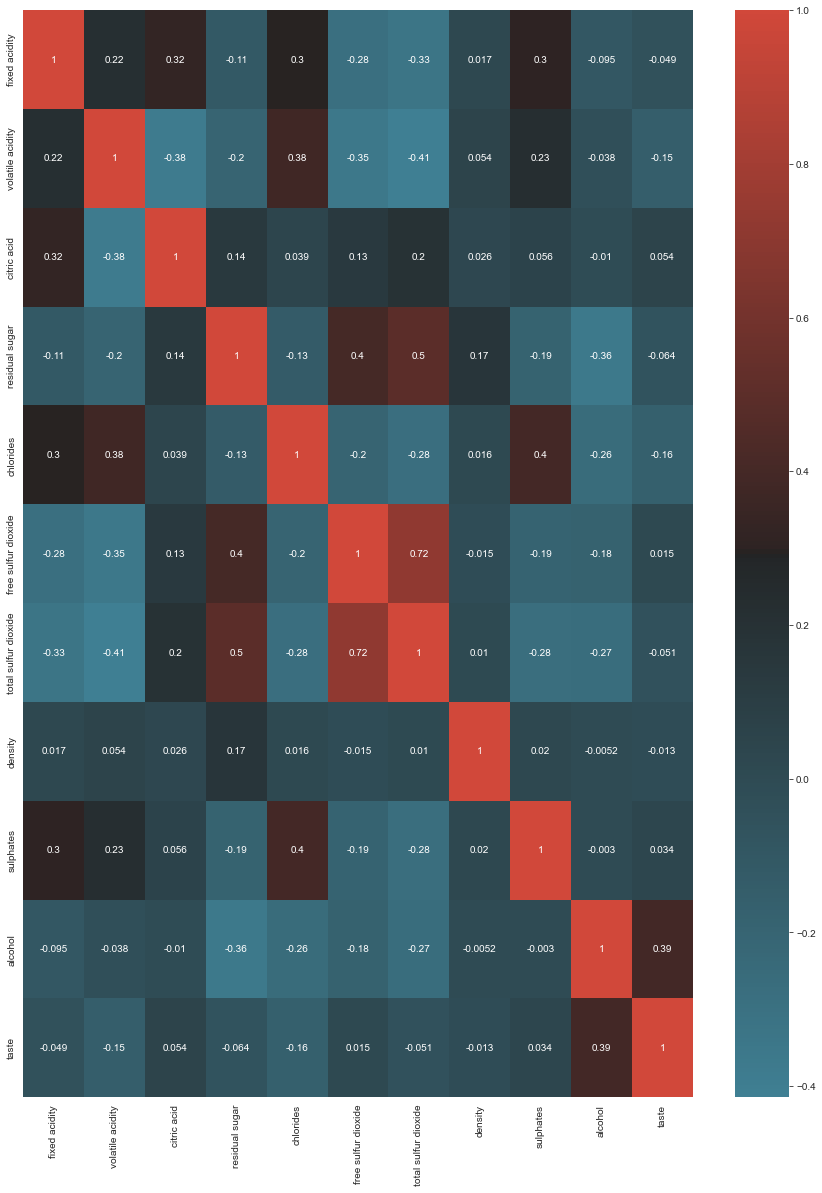

In [503]:
correlation = df.corr()
plt.subplots(figsize = (15,20))
sns.heatmap(correlation,xticklabels = correlation.columns, yticklabels = correlation.columns, annot=True, cmap = sns.diverging_palette(220,15,s=75,l=50,n=9,center='dark',as_cmap=True))


In [504]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,taste
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.017370,0.299568,-0.095452,-0.049447
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.053870,0.225984,-0.037640,-0.151714
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.026377,0.056197,-0.010493,0.054444
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.170827,-0.185927,-0.359415,-0.063992
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.015657,0.395593,-0.256916,-0.161781
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,-0.015006,-0.188457,-0.179838,0.014767
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.010500,-0.275727,-0.265740,-0.051226
density,0.017370,0.053870,0.026377,0.170827,0.015657,-0.015006,0.010500,1.000000,0.019843,-0.005156,-0.013190
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.019843,1.000000,-0.003029,0.033971
alcohol,-0.095452,-0.037640,-0.010493,-0.359415,-0.256916,-0.179838,-0.265740,-0.005156,-0.003029,1.000000,0.390486


In [505]:
# X = df.drop(['taste'],axis = 1).to_numpy
# y = df['taste'].apply(lambda x: 1 if x == 'good' else 0).to_numpy(
# )